In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# # !pip install neattext 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load Data Viz Pkgs
import seaborn as sns

In [ ]:
# Load Text Cleaning Pkgs
!pip install neattext
import neattext as nfx

     |████████████████████████████████| 114 kB 5.3 MB/s 


In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/emoji/tweet_emotions.csv")

In [ ]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
# Value Counts
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

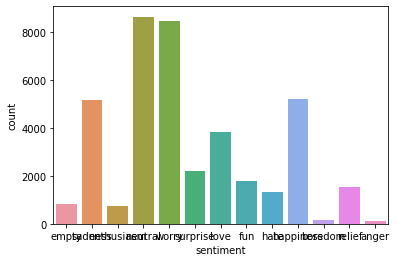

In [ ]:
# Plot
sns.countplot(x='sentiment',data=df)

In [ ]:
df['Clean_Text'] = df['content'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_hashtags)

In [ ]:
df

,tweet_id,sentiment,content,Clean_Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"want trade Houston tickets, will."
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...


In [ ]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from  sklearn.pipeline import Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
make_pipeline(Binarizer(), MultinomialNB())


Pipeline(steps=[('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# LogisticRegression Pipeline
#Multinomial Naive Bias
# pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('binarizer', Binarizer()),
#                         ('multinomialnb', MultinomialNB())])
# pipe_lr = Pipeline(steps=[(  'cv',CountVectorizer()),('lr',LogisticRegression())])
# pipe_lr=Pipeline([('cv',CountVectorizer()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
# pipe_lr=Pipeline([('cv',CountVectorizer()), ('gaussianNB', GaussianNB())], verbose = True)

In [ ]:
#Decision Tree Classifier
pipe_lr=Pipeline([('cv',CountVectorizer()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# tfidf = TfidfVectorizer()
# clf = GaussianNB()
# pipe_lr = Pipeline([('vect', tfidf), ('clf', clf)])
# pipeline.fit(X,Y)

In [ ]:
# Train and Fit Data

pipe_lr.fit(x_train,y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=  23.5s


Pipeline(steps=[('cv', CountVectorizer()),
                ('decision_tree', DecisionTreeClassifier())],
         verbose=True)

In [ ]:
pipe_lr

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.31916666666666665

In [ ]:
from sklearn.metrics import confusion_matrix

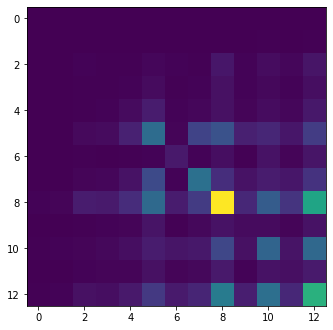

In [ ]:
# plt.figsize(100,100)
import matplotlib.pyplot as plt
pred=pipe_lr.predict(x_test)
cm=confusion_matrix(pred,y_test)
plt.rcParams["figure.figsize"] = (8,5.5)
plt.imshow(cm, interpolation='nearest')

In [ ]:
# Make A Prediction
ex1 = "you broke my heart"
pipe_lr.predict([ex1])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# To Know the classes
pipe_lr.classes_

In [ ]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
txt=pd.read_csv('/content/drive/MyDrive/emoji/emoji.csv')

In [ ]:
txt=txt.iloc[:,0:14]


In [ ]:
txt

,Emoji,Empty,sadness,Enthusiasm,Neutral,worry,Surprise,Love,Fun,Happiness,hate,Relief,boredom,anger
0,😃,0.0,0.0,0.2,0.0,0.0,0.1,0.0,0.8,1.0,0.0,0.6,0.0,0
1,🙂,0.2,0.1,0.0,0.4,0.0,0.0,0.0,0.5,0.5,0.0,0.1,0.0,0
2,😁,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.7,0.9,0.0,0.2,0.0,0
3,😆,0.0,0.0,1.0,0.0,0.0,0.2,0.4,0.9,1.0,0.0,0.0,0.0,0
4,😅,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.4,0.4,0.0,0.0,0.0,0
5,🤣,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.3,0.0,0
6,😂,0.0,0.0,0.7,0.0,0.0,0.2,0.6,0.7,0.8,0.0,0.0,0.0,0
7,😊,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.7,0.0,0.4,0.0,0
8,🥰,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3,0.7,0.0,0.0,0.0,0
9,😍,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
import csv 

with open('/content/drive/MyDrive/Colab Notebooks/recommend.csv','w') as f:
      writer=csv.writer(f)
      t=txt.columns
      n=txt.shape[1]
      m=txt.shape[0]
      data=[]
      maxi=0
      for i in range(1,n):
        g=0
        for j in range(m):
           if txt.iloc[j,i]>0:
              g=g+1
        maxi=max(maxi,g)
      
      for i in range(maxi+1):
        data.append(i)
      writer.writerow(data)
            
      for i in range(1,n):
        y=[]
        y.append(t[i])
        for j in range(m):
           if txt.iloc[j,i]>0:
              
              y.append(txt.iloc[j,0])
        print(y)
        writer.writerow(y)
f.close()


['Empty', '🙂', '😕', '😔', '🤕']
['sadness', '🙂', '😕', '😟', '😔', '😲', '😧', '😞', '😣', '😪', '😴', '\U0001f971', '🤒', '🤕', '🤮', '🥴', '🤧', '😤', '👿', '😠']
['Enthusiasm', '😃', '😁', '😆', '🤣', '😂', '🤩', '😛', '😝', '\u200d🤗']
['Neutral', '🙂', '😔', '😞']
['worry', '😅', '😕', '😟', '😔', '😲', '😧', '😞', '😣', '😪', '😴', '\U0001f971', '🤒', '🤕', '🤢', '🥴', '🤧', '😵\u200d', '🤫']
['Surprise', '😃', '😆', '🤣', '😂', '🤩', '😟', '😲', '😧', '😵\u200d', '🤭']
['Love', '😆', '😂', '😊', '🥰', '😍', '🤩', '😚', '😗', '\u200d🤗']
['Fun', '😃', '🙂', '😁', '😆', '😅', '🤣', '😂', '😊', '🥰', '🤩', '😗', '🤪', '😛', '😝', '\u200d🤗', '🤭', '🤫']
['Happiness', '😃', '🙂', '😁', '😆', '😅', '🤣', '😂', '😊', '🥰', '🤩', '😗', '🤪', '😛', '😝', '\u200d🤗', '🤭']
['hate', '😕', '😟', '😔', '😞', '🤒', '🤢', '🤮', '😤', '👿', '😠']
['Relief', '😃', '🙂', '😁', '🤣', '😊', '🤧']
['boredom', '😕', '😟', '😔', '😧', '😞', '😪', '😴', '\U0001f971', '🤒', '🤕', '🤢', '🤮', '🥴', '🤧']
['anger', '😤', '👿', '😠', '🤬']


In [ ]:
p=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recommend.csv')

In [ ]:
p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Empty,🙂,😕,😔,🤕,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sadness,🙂,😕,😟,😔,😲,😧,😞,😣,😪,😴,🥱,🤒,🤕,🤮,🥴,🤧,😤,👿,😠
2,Enthusiasm,😃,😁,😆,🤣,😂,🤩,😛,😝,‍🤗,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neutral,🙂,😔,😞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,worry,😅,😕,😟,😔,😲,😧,😞,😣,😪,😴,🥱,🤒,🤕,🤢,🥴,🤧,😵‍,🤫,NaN
5,Surprise,😃,😆,🤣,😂,🤩,😟,😲,😧,😵‍,🤭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Love,😆,😂,😊,🥰,😍,🤩,😚,😗,‍🤗,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fun,😃,🙂,😁,😆,😅,🤣,😂,😊,🥰,🤩,😗,🤪,😛,😝,‍🤗,🤭,🤫,NaN,NaN
8,Happiness,😃,🙂,😁,😆,😅,🤣,😂,😊,🥰,🤩,😗,🤪,😛,😝,‍🤗,🤭,NaN,NaN,NaN
9,hate,😕,😟,😔,😞,🤒,🤢,🤮,😤,👿,😠,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
t="Love"
row=p.shape[0]
for i in range(row):
  if(p.iloc[i,0]==t):
    ind=i
    break
col = 1
val = p.iloc[ind,col:]
Emoj = [s for s in val if str(s) != 'nan']
print(Emoj)

['😆', '😂', '😊', '🥰', '😍', '🤩', '😚', '😗', '\u200d🤗']


In [ ]:
import csv 

with open('/content/drive/MyDrive/Colab Notebooks/emojirecommend.csv','w') as f:
      writer=csv.writer(f)
      t=txt.columns
      n=txt.shape[1]
      m=txt.shape[0]
      data=[]
      maxi=0
      for i in range(1,n):
        g=0
        for j in range(m):
           if txt.iloc[j,i]>0:
              g=g+1
        maxi=max(maxi,g)
      
      for i in range(maxi+1):
        data.append(i)
      writer.writerow(data)
            
      for i in range(1,n):
        emojiPair = {};
        em = []
        em.append(t[i])
        for j in range(m):
          if(txt.iloc[j,i] > 0):
            emojiPair[txt.iloc[j,0]] = txt.iloc[j,i];
        sortedEmoji = sorted(emojiPair.items(), key=lambda x: x[1],reverse=True);
        
        for u in sortedEmoji:
          em.append(u[0])
        writer.writerow(em)
f.close();

In [ ]:
emoji_map=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emojirecommend.csv')
emoji_map


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Empty,😔,🤕,😕,🙂,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sadness,😔,😕,😧,😪,🤒,🤕,🤧,😟,😞,😣,👿,😲,🤮,🥴,😤,😠,🙂,😴,🥱
2,Enthusiasm,😆,🤣,😂,🤩,😁,😝,😃,‍🤗,😛,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neutral,😔,🙂,😞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,worry,😟,🤒,🤕,😔,😕,🤧,🤫,😅,😧,😞,😣,😪,🥱,🤢,🥴,😴,😲,😵‍,NaN
5,Surprise,🤣,😲,😧,🤩,😟,😵‍,😆,😂,🤭,😃,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Love,🥰,😍,😚,😂,🤩,‍🤗,😆,😗,😊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fun,🤣,😆,😃,🤪,😝,🤭,😁,😂,😗,😛,🙂,😅,😊,🤩,‍🤗,🤫,🥰,NaN,NaN
8,Happiness,😃,😆,🤣,😁,😂,😝,‍🤗,😊,🥰,🤪,😛,🤩,🤭,🙂,😅,😗,NaN,NaN,NaN
9,hate,😤,😠,🤮,🤢,👿,😞,😔,😕,😟,🤒,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(emoji_map.iloc[:,:])
print(emoji_map.iloc[:,4])
# for i in range emoji_map

             0  1  2  3    4    5    6    7    8    9   10   11   12   13  \
0        Empty  😔  🤕  😕    🙂  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1      sadness  😔  😕  😧    😪    🤒    🤕    🤧    😟    😞    😣    👿    😲    🤮   
2   Enthusiasm  😆  🤣  😂    🤩    😁    😝    😃   ‍🤗    😛  NaN  NaN  NaN  NaN   
3      Neutral  😔  🙂  😞  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4        worry  😟  🤒  🤕    😔    😕    🤧    🤫    😅    😧    😞    😣    😪    🥱   
5     Surprise  🤣  😲  😧    🤩    😟   😵‍    😆    😂    🤭    😃  NaN  NaN  NaN   
6         Love  🥰  😍  😚    😂    🤩   ‍🤗    😆    😗    😊  NaN  NaN  NaN  NaN   
7          Fun  🤣  😆  😃    🤪    😝    🤭    😁    😂    😗    😛    🙂    😅    😊   
8    Happiness  😃  😆  🤣    😁    😂    😝   ‍🤗    😊    🥰    🤪    😛    🤩    🤭   
9         hate  😤  😠  🤮    🤢    👿    😞    😔    😕    😟    🤒  NaN  NaN  NaN   
10      Relief  😃  😊  🤣    😁    🤧    🙂  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
11     boredom  😴  😪  🥱    🥴    🤒    🤕    🤮    🤧    😔    😞    🤢    😕    😟   

In [ ]:
bot = pd.read_csv("/content/drive/MyDrive/emoji/chatbot_conservation.csv")
bot = bot.iloc[:,1:3]
bot


FileNotFoundError: ignored

In [ ]:
print(bot.shape)
botdf = []
for i in bot.values:
   temp = []
   if(i[0] == "flagged"):
      temp.append(1)
   else:
     temp.append(0)
   temp.append(i[1])
   botdf.append(temp)
botdf


In [ ]:
emotion_index={}
tol = 0
for i  in emoji_map.iloc[:,0]:
   emotion_index[i.lower()] = tol
   tol = tol+1
print(emotion_index)


In [ ]:
total_message,col = bot.shape
print(total_message)
for i in range (total_message-1,3,-1):
  s = ""
  last_msg = i
  for j in range(0,3,1):
     exp = botdf[last_msg][1]
     s = s+exp+". "
     last_msg = last_msg - 1
  print(s)
  emo = pipe_lr.predict([s])
  em = emo[0].lower()
  ind = emotion_index[em]
  emj= [s for s in emoji_map.iloc[:,ind] if str(s) != 'nan']
  print(emj)

  

In [ ]:
import joblib

In [ ]:
model = joblib.load('/content/drive/MyDrive/emoji/emotion.pkl')


In [ ]:
print(model.predict(["i hate you"]))

['hate']
